# Notebook for some EDA on TrainSet.txt

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("../data/TrainSet.txt", header=0, sep="\t")

In [3]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35084 entries, 0 to 35083
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Compound Identifier   35084 non-null  int64  
 1   Odor                  35084 non-null  object 
 2   Replicate             1960 non-null   object 
 3   Intensity             35084 non-null  object 
 4   Dilution              35084 non-null  object 
 5   subject #             35084 non-null  int64  
 6   INTENSITY/STRENGTH    35084 non-null  int64  
 7   VALENCE/PLEASANTNESS  25980 non-null  float64
 8   BAKERY                25980 non-null  float64
 9   SWEET                 25980 non-null  float64
 10  FRUIT                 25980 non-null  float64
 11  FISH                  25980 non-null  float64
 12  GARLIC                25980 non-null  float64
 13  SPICES                25980 non-null  float64
 14  COLD                  25980 non-null  float64
 15  SOUR               

,Compound Identifier,subject #,INTENSITY/STRENGTH,VALENCE/PLEASANTNESS,BAKERY,SWEET,FRUIT,FISH,GARLIC,SPICES,...,ACID,WARM,MUSKY,SWEATY,AMMONIA/URINOUS,DECAYED,WOOD,GRASS,FLOWER,CHEMICAL
count,3.508400e+04,35084.000000,35084.000000,25980.000000,25980.000000,25980.000000,25980.000000,25980.000000,25980.000000,25980.000000,...,25980.000000,25980.000000,25980.000000,25980.000000,25980.000000,25980.000000,25980.000000,25980.000000,25980.000000,25980.000000
mean,3.498355e+05,25.000000,39.890890,44.376135,3.416590,12.925212,4.953426,1.712240,3.387452,6.052002,...,5.886798,5.772132,8.407275,4.137837,5.118129,4.778907,3.468129,3.428329,6.057236,15.615012
std,1.214971e+06,14.142337,37.002882,27.754299,14.041675,25.041555,16.943679,9.629778,13.755972,17.293312,...,16.266140,16.829423,20.589364,14.822344,16.899752,16.507106,13.807406,14.127427,18.806966,27.592485
min,1.260000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.341000e+03,13.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.125700e+04,25.000000,36.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.132500e+04,37.000000,75.000000,63.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000
max,6.999977e+06,49.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [4]:
df = df[df.Replicate.isna()].drop("Replicate", axis=1)

In [138]:
# df.groupby(by="Intensity").size()
df_low = df[df["Intensity"] == "low "]
df_high = df[df["Intensity"] == "high "]

(16562, 26)

In [208]:
pd.concat([df_high.isna().sum(), df_low.isna().sum()], axis=1)

,0,1
Compound Identifier,0,0
Odor,0,0
Intensity,0,0
Dilution,0,0
subject #,0,0
INTENSITY/STRENGTH,0,0
VALENCE/PLEASANTNESS,2192,6425
BAKERY,2192,6425
SWEET,2192,6425
FRUIT,2192,6425


In [223]:
from itertools import combinations

from scipy.stats import pearsonr

def pairwise_cors(df, min_cor=0):
    cors = []
    for i, j in combinations(df.columns, 2):
        cors.append([i, j, *pearsonr(df[i], df[j])])
    
    df_cors = pd.DataFrame(
        sorted(cors, key=lambda x: abs(x[2]), reverse=True), 
        columns=["variable_1", "variable_2", "cor", "pval"]
    )
    return df_cors[abs(df_cors["cor"]) > min_cor]

In [224]:
pairwise_cors(df=df_high.dropna().loc[:, "BAKERY":"CHEMICAL"]).head(20)

,variable_1,variable_2,cor,pval
0,SWEET,FRUIT,0.476303,0.000000e+00
1,MUSKY,SWEATY,0.421968,0.000000e+00
2,ACID,CHEMICAL,0.376002,0.000000e+00
3,FISH,GARLIC,0.343379,0.000000e+00
4,ACID,AMMONIA/URINOUS,0.332090,0.000000e+00
5,BAKERY,SWEET,0.316699,0.000000e+00
6,SOUR,MUSKY,0.296179,8.036089e-289
7,AMMONIA/URINOUS,CHEMICAL,0.285709,4.877909e-268
8,GARLIC,SPICES,0.259832,2.102284e-220
9,SOUR,SWEATY,0.257757,8.276969e-217


In [226]:
pairwise_cors(df=df_low.dropna().loc[:, "BAKERY":"CHEMICAL"]).head(20)

,variable_1,variable_2,cor,pval
0,SWEET,FRUIT,0.408091,0.000000e+00
1,FISH,GARLIC,0.385087,0.000000e+00
2,ACID,CHEMICAL,0.352374,3.717486e-294
3,MUSKY,SWEATY,0.344186,7.351338e-280
4,BAKERY,SWEET,0.333320,1.520931e-261
5,ACID,AMMONIA/URINOUS,0.326784,7.041573e-251
6,SOUR,MUSKY,0.298980,2.197818e-208
7,AMMONIA/URINOUS,CHEMICAL,0.298556,9.005647e-208
8,GARLIC,MUSKY,0.280350,2.001143e-182
9,GARLIC,SOUR,0.276495,2.684212e-177


In [179]:
(df_pairwise_cors
           .pivot(columns="Odor2", values="cor", index="Odor1"))

Odor2,ACID,AMMONIA/URINOUS,BURNT,CHEMICAL,COLD,DECAYED,FISH,FLOWER,FRUIT,GARLIC,GRASS,MUSKY,SOUR,SPICES,SWEATY,SWEET,WARM,WOOD
Odor1,,,,,,,,,,,,,,,,,,
ACID,NaN,0.332090,NaN,0.376002,NaN,0.030927,NaN,-0.066847,NaN,NaN,0.004907,0.085025,NaN,NaN,0.046933,NaN,0.019554,0.034513
AMMONIA/URINOUS,NaN,NaN,NaN,0.285709,NaN,0.121631,NaN,-0.047723,NaN,NaN,0.049965,NaN,NaN,NaN,NaN,NaN,NaN,0.032201
BAKERY,-0.070263,-0.067470,0.055271,-0.105718,-0.024313,-0.062404,-0.025004,0.033298,0.114789,0.055218,-0.016929,-0.051272,-0.046372,0.142087,-0.052292,0.316699,0.193198,0.003590
BURNT,0.147464,0.117249,NaN,0.094228,NaN,0.056136,NaN,-0.052990,NaN,NaN,0.036266,0.172795,NaN,NaN,0.111896,NaN,0.169290,0.208400
COLD,0.127705,0.110196,0.001999,0.156048,NaN,0.073353,NaN,0.101962,NaN,NaN,0.103196,-0.032050,0.029359,NaN,-0.033035,NaN,-0.046094,0.010235
DECAYED,NaN,NaN,NaN,-0.013787,NaN,NaN,NaN,-0.027394,NaN,NaN,0.029619,NaN,NaN,NaN,NaN,NaN,NaN,0.033594
FISH,0.039508,0.075025,0.102921,-0.006391,-0.018454,0.129646,NaN,-0.051464,NaN,0.343379,0.048795,0.165958,0.148641,0.081108,0.151910,NaN,0.070904,0.040159
FLOWER,NaN,NaN,NaN,-0.077260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FRUIT,-0.056519,-0.061938,-0.075019,-0.076561,0.104197,-0.013202,-0.052260,0.202162,NaN,-0.060536,0.041688,-0.090913,-0.021724,-0.017537,-0.066129,NaN,0.073708,-0.049442


<AxesSubplot:xlabel='Intensity', ylabel='VALENCE/PLEASANTNESS'>

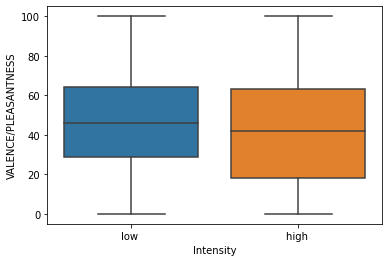

In [6]:
sns.boxplot(data=df, y="VALENCE/PLEASANTNESS", x="Intensity")

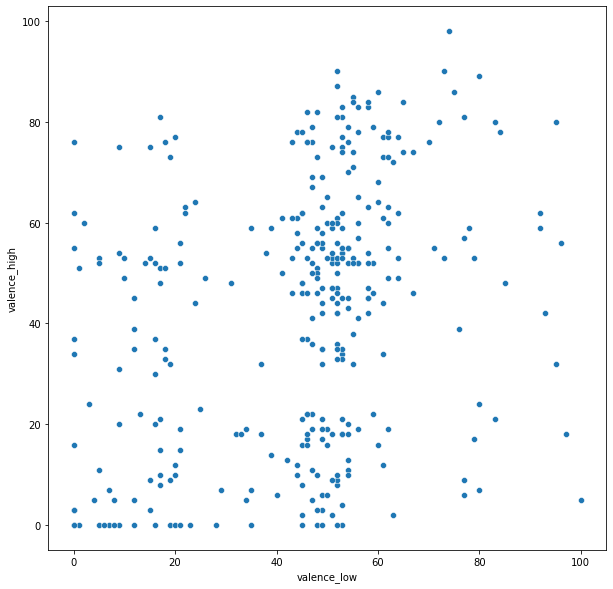

,subject,Odor,intensity_high,intensity_low,valence_high,valence_low
0,1,( + )-menthol,80,82,49.0,10.0
1,1,(-)-Carvone,79,54,86.0,75.0
2,1,(-)-Isopulegol,100,76,90.0,73.0
3,1,(-)-beta-Pinene,61,0,59.0,16.0
4,1,(1R)-(-)-Myrtenal,59,0,76.0,47.0


In [120]:
df_intensity = (df[["subject #", "Odor", 'Intensity', "INTENSITY/STRENGTH"]]
           .pivot_table(columns="Intensity", values="INTENSITY/STRENGTH", index=["subject #", "Odor"])
           .reset_index())
df_intensity.columns = ["subject", "Odor", "intensity_high", "intensity_low"]

df_valence = (df[["subject #", "Odor", 'Intensity', "VALENCE/PLEASANTNESS"]]
           .pivot_table(columns="Intensity", values="VALENCE/PLEASANTNESS", index=["subject #", "Odor"])
           .reset_index())
df_valence.columns = ["subject", "Odor", "valence_high", "valence_low"]

df_wide = pd.concat([
    df_intensity,
    df_valence.drop(["subject", "Odor"], axis=1)
], axis=1)


fig = plt.figure(figsize=(10, 10))
sns.scatterplot(
    data=df_wide[df_wide["subject"] == 1],
    x="valence_low",
    y="valence_high"
)
plt.show()

df_wide.head()

In [104]:
for i, j in df_wide.groupby("Odor"):
    diff = j.intensity_high.mean() - j.intensity_low.mean()
    if diff < 0 :
        print(i, j.intensity_high.mean(), j.intensity_low.mean(), diff)
df_wide.groupby("Odor").mean().head()

(S)-( + )-2-butanol  8.040816326530612 13.26530612244898 -5.224489795918368
2-Furanmethanethiol formate  85.6938775510204 87.14285714285714 -1.448979591836732
2-Methylfuran  12.46938775510204 17.571428571428573 -5.102040816326532
5-Ethyl-3-hydroxy-4-methyl-2(5H)-furanone  22.387755102040817 37.63265306122449 -15.244897959183671
Benzene  5.673469387755102 8.142857142857142 -2.4693877551020407
Butylamine  6.408163265306122 11.73469387755102 -5.326530612244898
Isoamyl cinnamate  7.204081632653061 10.0 -2.795918367346939
Isopropyl alcohol  3.5510204081632653 4.285714285714286 -0.7346938775510203
Methyl 3-(methylthio)propionate  15.979591836734693 18.3265306122449 -2.346938775510205
Pyrrolidine  11.653061224489797 15.040816326530612 -3.387755102040815
Thiophene  16.163265306122447 20.081632653061224 -3.9183673469387763
geranyl acetate  9.326530612244898 12.081632653061224 -2.7551020408163254
isopropyl acetate  4.346938775510204 9.571428571428571 -5.224489795918367
methyl sulfide  49.7142857

,subject,intensity_high,intensity_low
Odor,,,
( + )-menthol,25.0,83.673469,42.612245
(-)-Carvone,25.0,85.183673,72.102041
(-)-Isopulegol,25.0,81.163265,11.367347
(-)-beta-Pinene,25.0,72.653061,18.000000
(1R)-(-)-Myrtenal,25.0,52.163265,15.428571
